In [4]:
import pandas as pd
import scipy
import matplotlib.pyplot  as plt


Peaks:  [0.0153 0.0437 0.0859 0.1078 0.161  0.1829 0.2381 0.2582 0.3115 0.3334
 0.3867 0.4086 0.4671 0.4955 0.5382 0.5601 0.614  0.6359 0.6949 0.7233
 0.7667 0.7886 0.8435 0.8654 0.9202 0.9421 0.9967 1.0186 1.0754 1.1066
 1.1505 1.1724 1.2275 1.2494 1.305  1.3269 1.3825 1.4044 1.4602 1.4821
 1.543  1.5714 1.6163 1.6382 1.6947 1.7166 1.7778 1.8062 1.8518 1.8737
 1.9305 1.9524 2.0097 2.0316 2.0888 2.1107 2.1693 2.1912 2.2541 2.2825
 2.3338 2.3622 2.4116 2.435  2.482  2.5039 2.571  2.5931 2.6141 2.6507
 2.6726 2.7316 2.7535 2.8128 2.8347 2.8943 2.9162 2.9761 2.998  3.0581
 3.08   3.1422 3.1623 3.2231 3.245  3.3075 3.3387 3.3881 3.41   3.471
 3.4929 3.554  3.5759 3.642  3.6629 3.721  3.7429 3.8092 3.8376 3.8883
 3.9102 3.9769 4.0053 4.0562 4.0781 4.1406 4.1625 4.2251 4.247  4.3098
 4.3317 4.3965 4.4277 4.4847 4.5131 4.5655 4.5874 4.651  4.6729 4.7369
 4.7588 4.8231 4.845  4.9115 4.9316 4.9964 5.0183 5.0831 5.105  5.1746
 5.203  5.2618 5.2902 5.3447 5.3666 5.4327 5.4546 5.521  5.5429 5.6139

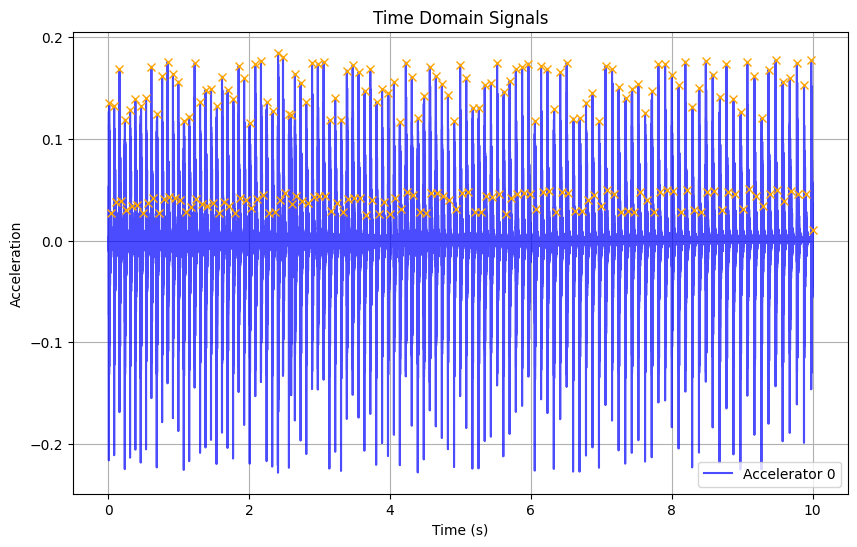

In [8]:

file = r"C:\Users\amart\OneDrive\Documents\Acoustic-Space-Boiling\Data\After_May\MATLAB 3-59 PM Tue, Sep 17, 2024 Run7 .csv"

data = pd.read_csv(file, index_col="Time")
time = data.index

acceleration0 = data['0'] #Using only accelerometer 0

peaks, _ = scipy.signal.find_peaks(acceleration0, distance = 200, height=.01) #This height needs to be configured
peaks = peaks / 10000 #time of peaks

print("Peaks: ", peaks)
print("Peak values: ", data.loc[peaks])

# 2. Plot the time domain signals
plt.figure(figsize=(10, 6))
plt.plot(time, acceleration0, label='Accelerator 0', color='blue', alpha=0.7)
#plt.plot(time, acceleration1, label='Accelerator 1', color='orange', alpha=0.7)
plt.plot(peaks, acceleration0.loc[peaks], "x", color="orange")
plt.title('Time Domain Signals')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration')
plt.legend()
plt.grid(True)
plt.show()